<a href="https://colab.research.google.com/github/luizrenault/tp547/blob/main/estudo_caso/queuexor_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudo de Caso**

O nó relay (retransmissor) de uma rede de comunicação cooperativa possui uma fila com buffer com capacidade para armazenar N pacotes (incluindo o pacote que está em atendimento, ou seja, sendo transmitido pelo relay). Os pacotes recebidos pelo relay são colocados na fila e transmitidos da seguinte forma: se houver um único pacote na fila ele é transmitido imediatamente; se houver dois ou mais pacotes na fila, o relay faz uma operação ou-exclusivo (XOR) entre os dois pacotes, transmite o pacote resultante da operação XOR e retira os dois pacotes utilizados para fazer o XOR da fila. A taxa de chegada de pacotes na fila do relay é λ pacotes/segundo. O enlace de saída do nó relay permite a transmissão de μ pacotes/segundo.



In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros

lambda1=1 #chegadas/tempo - taxa media de chegada
mu1=0.8 #partidas/tempo - taxa media de partida
Nq=np.infty #tamanho da fila
TS=20000 #tempo máximo de simulação
xor = 2

def chegada():
  return np.random.exponential(1/lambda1)

def partida():
  #return 1/mu1
  return np.random.exponential(1/mu1)

def simulacao():

    # estatísticas de simulação
    t = 0 #tempo inicial
    lq = 0 #numero de usuários na fila
    ls = 0 #numero de usuários no servidor
    k1 = 0 #número de chegadas
    k2 = 0 #número de serviços
    k = 0 #numero de partidas
    b = 0 #numero de bloqueios


    tc = [] #tempo de chegadas
    tp = [] #tempo de partidas
    ts = [] #tempo no sistema
    kxor = [] #número de pacotes transmitidos

    ta = t + chegada() #proxima chegada
    td = np.infty #proxima partida
    t = np.minimum(ta, td) #proximo tempo de execucao

    while (t < TS): #tempo limite de simulacao
        if ta<td: #evento de chegada
            k1 = k1 + 1 #incrementa o número de chegadas
            if lq < Nq:
                lq = lq + 1 #aumenta a fila
                tc = np.append(tc, t) #aramazena tempo atual de chegada
                #print(f"Chegada  F({lq})S({ls})T({t})")
            else:
                b = b + 1 #incrementa o número de bloqueios
                #print(f"Bloqueio F({lq})S({ls})T({t})")
            ta = t + chegada() #gera nova chegada

        else: #evento de partida
            while ls > 0: #simula partida de pacotes
              k = k + 1 #incrementa o numero de partidas
              tp = np.append(tp, t) #armazeno o tempo da partida
              ts = np.append(ts, (tp[k - 1] - tc[k - 1])) #calculo o tempo no sistema
              ls = ls - 1

            td = np.infty #coloco um valor muito grande para a proxima partida
            #print(f"Partida  F({lq})S({ls})T({t})")

        if ls == 0 and lq > 0: #servidor desocupado e pacote na fila
            while lq > 0 and ls < xor: #simula XOR entre pacotes, tirando pacotes da fila
              lq = lq - 1 #remove pacote da fila
              k2 = k2 + 1 #incrementa o número de serviços
              ls = ls + 1 #ocupa o servidor

            kxor = np.append(kxor, ls)
            td = t + partida() #gera nova partida
            #print(f"Serviço  F({lq})S({ls})T({t})")

        t = np.minimum(ta, td) #calculo o tempo minimo entre chegada e partida
    tq=np.mean(ts)
    tw=tq-1/mu1
    eq=lambda1*tq
    ew=lambda1*tw
    rho=lambda1/mu1
    pb = b/k1

    print(f"=================={rho}=================")
    print(f"fator de utilizacao rho: {rho}")
    print(f"tempo no sistema: {tq}")
    print(f"tempo na fila: {tw}")
    print(f"numero medio de usuários no sistema: {eq}")
    print(f"numero medio de usuários na fila: {ew}")
    print(f"probabilidade de bloqueios: {pb}")
    print(f"bloqueios: {b}")
    print(f"chegadas: {k1}")
    print(f"fila: {lq}")
    print(f"entrada sv: {k2}")
    print(f"partidas: {k}")

    return rho, tq, tw, eq, ew, pb, Nq, np.mean(kxor)


In [42]:
#simulação

rhos = np.arange(0,2,0.01)

resultado = np.array([])

rhovec = np.array([])
tqvec = np.array([])
eqvec = np.array([])
pbvec = np.array([])
kxorvec = np.array([])

TS=20000 #tempo máximo de simulação
Nq=np.infty

for thisrho in rhos:
    if thisrho == 0:
        continue
    mu1 = lambda1 / thisrho
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    rhovec = np.append(rhovec, rho)
    tqvec = np.append(tqvec, tq)
    eqvec = np.append(eqvec, eq)
    pbvec = np.append(pbvec, pb)
    kxorvec = np.append(kxorvec, kxor)




==================0.01=================
fator de utilizacao rho: 0.01
tempo no sistema: 0.01007235421166259
tempo na fila: 7.23542116625904e-05
numero medio de usuários no sistema: 0.01007235421166259
numero medio de usuários na fila: 7.23542116625904e-05
probabilidade de bloqueios: 0.0
bloqueios: 0
chegadas: 20044
fila: 0
entrada sv: 20044
partidas: 20044
==================0.02=================
fator de utilizacao rho: 0.02
tempo no sistema: 0.02054357916858297
tempo na fila: 0.0005435791685829694
numero medio de usuários no sistema: 0.02054357916858297
numero medio de usuários na fila: 0.0005435791685829694
probabilidade de bloqueios: 0.0
bloqueios: 0
chegadas: 19983
fila: 0
entrada sv: 19983
partidas: 19983
==================0.03=================
fator de utilizacao rho: 0.03
tempo no sistema: 0.031037259781140504
tempo na fila: 0.0010372597811405052
numero medio de usuários no sistema: 0.031037259781140504
numero medio de usuários na fila: 0.0010372597811405052
probabilidade de blo

In [47]:
pbvec_5 = np.array([])
pbvec_10 = np.array([])
pbvec_50 = np.array([])

TS=10000 #tempo máximo de simulação

for thisrho in rhos:
    if thisrho == 0:
        continue
    mu1 = lambda1 / thisrho
    Nq=5
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    pbvec_5 = np.append(pbvec_5, pb)

    Nq=10
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    pbvec_10 = np.append(pbvec_10, pb)

    Nq=50
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    pbvec_50 = np.append(pbvec_50, pb)


A saída de streaming foi truncada nas últimas 5000 linhas.
numero medio de usuários no sistema: 0.9627127190931543
numero medio de usuários na fila: 0.35271271909315427
probabilidade de bloqueios: 0.004216867469879518
bloqueios: 42
chegadas: 9960
fila: 0
entrada sv: 9918
partidas: 9917
==================0.61=================
fator de utilizacao rho: 0.61
tempo no sistema: 0.9942240481562632
tempo na fila: 0.3842240481562632
numero medio de usuários no sistema: 0.9942240481562632
numero medio de usuários na fila: 0.3842240481562632
probabilidade de bloqueios: 0.0
bloqueios: 0
chegadas: 9879
fila: 2
entrada sv: 9877
partidas: 9875
==================0.61=================
fator de utilizacao rho: 0.61
tempo no sistema: 0.994702454093838
tempo na fila: 0.38470245409383796
numero medio de usuários no sistema: 0.994702454093838
numero medio de usuários na fila: 0.38470245409383796
probabilidade de bloqueios: 0.0
bloqueios: 0
chegadas: 9911
fila: 0
entrada sv: 9911
partidas: 9911
=============

<ipython-input-50-136949c733fe>:3: RuntimeWarning: divide by zero encountered in divide
  eqmm1 = rhovec / (1-rhovec)
<ipython-input-50-136949c733fe>:4: RuntimeWarning: divide by zero encountered in divide
  tqmm1 = 1 / (lambda1 / rhovec - lambda1)
<ipython-input-50-136949c733fe>:5: RuntimeWarning: invalid value encountered in divide
  pbmm1_5 = (rhovec**5) * (1-rhovec) / (1-rhovec**6)
<ipython-input-50-136949c733fe>:6: RuntimeWarning: invalid value encountered in divide
  pbmm1_10 = (rhovec**10) * (1-rhovec) / (1-rhovec**11)
<ipython-input-50-136949c733fe>:7: RuntimeWarning: invalid value encountered in divide
  pbmm1_50 = (rhovec**50) * (1-rhovec) / (1-rhovec**51)


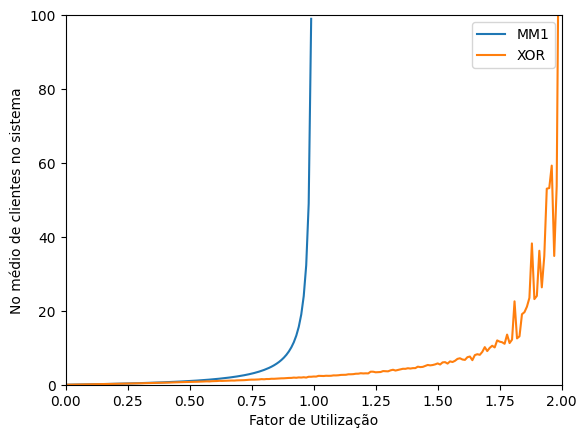

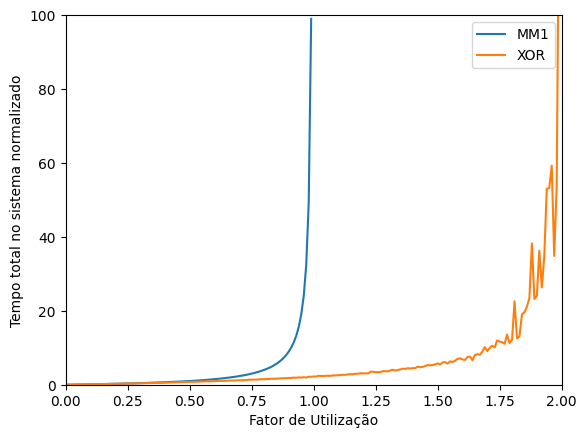

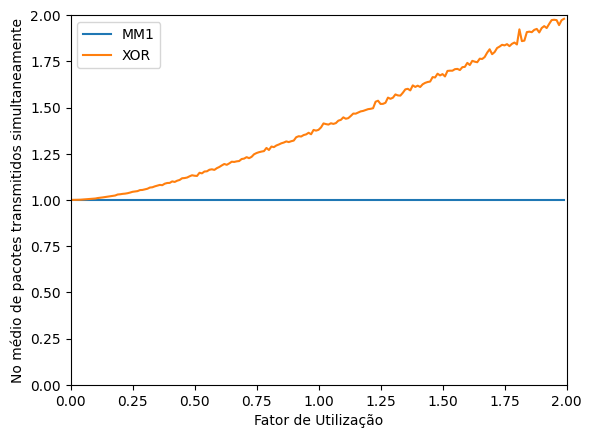

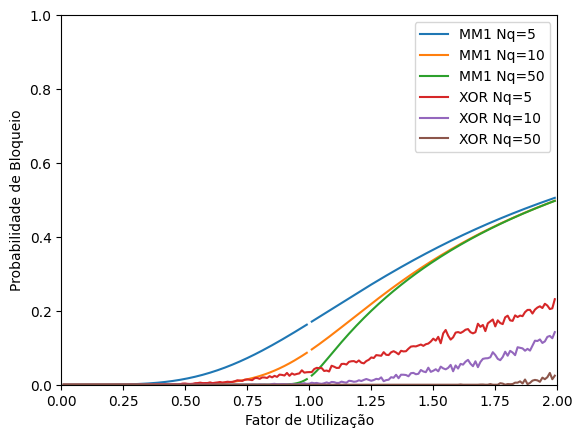

In [50]:
import matplotlib.pyplot as plt

eqmm1 = rhovec / (1-rhovec)
tqmm1 = 1 / (lambda1 / rhovec - lambda1)
pbmm1_5 = (rhovec**5) * (1-rhovec) / (1-rhovec**6)
pbmm1_10 = (rhovec**10) * (1-rhovec) / (1-rhovec**11)
pbmm1_50 = (rhovec**50) * (1-rhovec) / (1-rhovec**51)

plt.figure()
plt.ylabel('No médio de clientes no sistema')
plt.xlabel('Fator de Utilização')
plt.plot(rhovec, eqmm1, label='MM1')
plt.plot(rhovec, eqvec, label='XOR')
plt.xlim(0, 2)
plt.ylim(0,100)
plt.legend()
plt.show()


plt.figure()
plt.ylabel('Tempo total no sistema normalizado')
plt.xlabel('Fator de Utilização')
plt.plot(rhovec, tqmm1, label='MM1')
plt.plot(rhovec, tqvec, label='XOR')
plt.xlim(0, 2)
plt.ylim(0,100)
plt.legend()
plt.show()

plt.figure()
plt.ylabel('No médio de pacotes transmitidos simultaneamente')
plt.xlabel('Fator de Utilização')
plt.plot(rhovec, np.ones(rhovec.size), label='MM1')
plt.plot(rhovec, kxorvec, label='XOR')
plt.xlim(0, 2)
plt.ylim(0,2)
plt.legend()
plt.show()

plt.figure()
plt.ylabel('Probabilidade de Bloqueio')
plt.xlabel('Fator de Utilização')
plt.plot(rhovec, pbmm1_5, label='MM1 Nq=5')
plt.plot(rhovec, pbmm1_10, label='MM1 Nq=10')
plt.plot(rhovec, pbmm1_50, label='MM1 Nq=50')
plt.plot(rhovec, pbvec_5, label='XOR Nq=5')
plt.plot(rhovec, pbvec_10, label='XOR Nq=10')
plt.plot(rhovec, pbvec_50, label='XOR Nq=50')
plt.xlim(0, 2)
plt.ylim(0,1)
plt.legend()
plt.show()
